In [2]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline

          

def estimate_average(b,delt,rew, graph):
    x_limit = 100
    averaged_data = {}
    data_lists = {}
    i = 0
    with open('ExperimentRunner/src/'+graph+'/beta'+str(b)+'/delta'+str(delt)+'/experiment'+str(rew)+'_1.csv', 'rb') as f:
        reader = csv.reader(f)
        for row in reader:
            data_lists[i] = list(row)
            i=i+1

    timesteps = {}
    events = {}
    s = {}
    e = {}
    i = {}
    d = {}
    r = {}
    dr = {}
    k = 0
    for j in data_lists:
        if j%8==0:
            timesteps[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
        if j%8==1:
            events[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
        if j%8==2:
            s[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
        if j%8==3:
            e[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
        if j%8==4:
            i[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
        if j%8==5:
            d[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
        if j%8==6:
            r[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
        if j%8==7:
            dr[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
            k=k+1

    max_time = 0
    for j in timesteps:
        local_max = max(timesteps[j])
        if local_max>max_time:
            max_time = local_max

    for j in timesteps:
        index = 0
        local_s = [0]*(max_time+1)
        local_e = [0]*(max_time+1)
        local_i = [0]*(max_time+1)
        local_d = [0]*(max_time+1)
        local_r = [0]*(max_time+1)
        local_dr = [0]*(max_time+1)
        last_value_s = s[j][0]
        last_value_e = e[j][0]
        last_value_i = i[j][0]
        last_value_d = d[j][0]
        last_value_r = r[j][0]
        last_value_dr = dr[j][0]
        for m in range(0, max_time+1):
            if index<len(timesteps[j]) and timesteps[j][index]==m:
                local_s[m] = s[j][index]
                last_value_s = s[j][index]
                local_e[m] = e[j][index]
                last_value_e = e[j][index]
                local_i[m] = i[j][index]
                last_value_i = i[j][index]
                local_d[m] = d[j][index]
                last_value_d = d[j][index]
                local_r[m] = r[j][index]
                last_value_r = r[j][index]
                local_dr[m] = dr[j][index]
                last_value_dr = dr[j][index]
                index=index+1
            else:
                local_s[m] = last_value_s
                local_e[m] = last_value_e
                local_i[m] = last_value_i
                local_d[m] = last_value_d
                local_r[m] = last_value_r
                local_dr[m] = last_value_dr
        s[j] = local_s
        e[j] = local_e
        i[j] = local_i
        d[j] = local_d
        r[j] = local_r
        dr[j] = local_dr

    rdr = {}
    plots = {}
    index = 0
    for j in r:
        rdr[j] = [x + y for x, y in zip(r[j], dr[j])]
#     plt.figure(figsize = (10, 7))
#     for j in s:
#         plots[index] = plt.plot(range(0,max_time), s[j][:max_time], 'y-', label='susceptible')
#         index=index+1
#         plots[index] = plt.plot(range(0,max_time), e[j][:max_time], 'b-', label='exposed')
#         index=index+1
#         plots[index] = plt.plot(range(0,max_time), i[j][:max_time], 'r-', label='infected')
#         index=index+1
#         plots[index] = plt.plot(range(0,max_time), d[j][:max_time], 'k-', label='dead')
#         index=index+1
#         rdr[j] = [x + y for x, y in zip(r[j], dr[j])]
#         plots[index] = plt.plot(range(0,max_time), rdr[j][:max_time], 'g-', label='removed')
#         index=index+1
#     plt.title('Disease Dynamic. SEIDR Model.')
#     plt.xlabel('time steps')
#     plt.ylabel('number of individuals')
#     plt.savefig('ExperimentRunner/src/ERgraphExperiments/beta'+str(b)+'/delta'+str(delt)+'/experiment'+str(rew)+'all.png')
    s_average = [0]*(max_time+1)
    e_average = [0]*(max_time+1)
    i_average = [0]*(max_time+1)
    d_average = [0]*(max_time+1)
    rdr_average = [0]*(max_time+1)
    num_of_experiments = len(s)
    for m in range(0, max_time+1):
        local_sum_s = 0
        local_sum_e = 0
        local_sum_i = 0
        local_sum_d = 0
        local_sum_rdr = 0
        for j in s:
            local_sum_s=local_sum_s+s[j][m]
            local_sum_e=local_sum_e+e[j][m]
            local_sum_i=local_sum_i+i[j][m]
            local_sum_d=local_sum_d+d[j][m]
            local_sum_rdr=local_sum_rdr+rdr[j][m]
        s_average[m]=(local_sum_s+0.0)/num_of_experiments
        e_average[m]=(local_sum_e+0.0)/num_of_experiments
        i_average[m]=(local_sum_i+0.0)/num_of_experiments
        d_average[m]=(local_sum_d+0.0)/num_of_experiments
        rdr_average[m]=(local_sum_rdr+0.0)/num_of_experiments
    averaged_data = {}
    averaged_data['s'] = s_average
    averaged_data['e'] = e_average
    averaged_data['i'] = i_average
    averaged_data['d'] = d_average
    averaged_data['rdr'] = rdr_average
    averaged_data['max_time'] = max_time
#     max_time = 100
#     plt.figure(figsize = (10, 7))
#     plt.plot(range(0,max_time), s_average[:max_time], 'y-',label='susceptible')
#     plt.plot(range(0,max_time), e_average[:max_time], 'b-',label='exposed')
#     plt.plot(range(0,max_time), i_average[:max_time], 'r-',label='infected')
#     plt.plot(range(0,max_time), d_average[:max_time], 'k-',label='dead')
#     plt.plot(range(0,max_time), rdr_average[:max_time], 'g-',label='removed')
#     plt.title('Disease Dynamic. SEIDR Model.')
#     plt.xlabel('time steps')
#     plt.ylabel('number of individuals')
#     plt.legend(loc = 'upper right')
#     print 'ExperimentRunner/src/ERgraphExperiments/beta'+str(b)+'/delta'+str(delt)+'/experiment'+str(rew)+'averaged.png'
#     plt.savefig('ExperimentRunner/src/ERgraphExperiments/beta'+str(b)+'/delta'+str(delt)+'/experiment'+str(rew)+'averaged.png')
    return averaged_data



In [3]:
def seir_estimate_average(b, graph):
    data_lists = {}
    i = 0
    with open('ExperimentRunner/src/'+graph+'/beta'+str(b)+'/seir-experiment1_1.csv', 'rb') as f:
        reader = csv.reader(f)
        for row in reader:
            data_lists[i] = list(row)
            i=i+1

    # print data_lists
    timesteps = {}
    events = {}
    s = {}
    e = {}
    i = {}
    r = {}
    k = 0
    for j in data_lists:
        if j%6==0:
            timesteps[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
        if j%6==1:
            events[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
        if j%6==2:
            s[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
        if j%6==3:
            e[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
        if j%6==4:
            i[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
        if j%6==5:
            r[k] = [int(data_lists[j][m]) for m in range(len(data_lists[j])) if m!=0 and data_lists[j][m]!='']
            k=k+1

    max_time = 0
    for j in timesteps:
        local_max = max(timesteps[j])
        if local_max>max_time:
            max_time = local_max

    for j in timesteps:
        index = 0
        local_s = [0]*(max_time+1)
        local_e = [0]*(max_time+1)
        local_i = [0]*(max_time+1)
        local_r = [0]*(max_time+1)
        last_value_s = s[j][0]
        last_value_e = e[j][0]
        last_value_i = i[j][0]
        last_value_r = r[j][0]
        for m in range(0, max_time+1):
            if index<len(timesteps[j]) and timesteps[j][index]==m:
                local_s[m] = s[j][index]
                last_value_s = s[j][index]
                local_e[m] = e[j][index]
                last_value_e = e[j][index]
                local_i[m] = i[j][index]
                last_value_i = i[j][index]
                local_r[m] = r[j][index]
                last_value_r = r[j][index]
                index=index+1
            else:
                local_s[m] = last_value_s
                local_e[m] = last_value_e
                local_i[m] = last_value_i
                local_r[m] = last_value_r
        s[j] = local_s
        e[j] = local_e
        i[j] = local_i
        r[j] = local_r
        
#     plots = {}
#     plt.figure(figsize = (10, 7))
#     index = 0
#     for j in s:
#         plots[index] = plt.plot(range(0,max_time+1), s[j], 'y-', label='susceptible')
#         index=index+1
#         plots[index] = plt.plot(range(0,max_time+1), e[j], 'b-', label='exposed')
#         index=index+1
#         plots[index] = plt.plot(range(0,max_time+1), i[j], 'r-', label='infected')
#         index=index+1
#         plots[index] = plt.plot(range(0,max_time+1), r[j], 'g-', label='removed')
#         index=index+1
#     plt.title('Disease Dynamic. SEIR Model')
#     plt.xlabel('time steps')
#     plt.ylabel('number of individuals')
#     # plt.legend([plots[index] for index in plots if index<6],['susceptible','exposed', 'infected', 'dead', 'removed'])
#     plt.savefig('ExperimentRunner/src/HCgraphExperiment/beta'+str(b)+'/seir_experiment_all.png')
#     _ = plt.show()
    s_average = [0]*(max_time+1)
    e_average = [0]*(max_time+1)
    i_average = [0]*(max_time+1)
    r_average = [0]*(max_time+1)
    num_of_experiments = len(s)
    for m in range(0, max_time+1):
        local_sum_s = 0
        local_sum_e = 0
        local_sum_i = 0
        local_sum_r = 0
        for j in s:
            local_sum_s=local_sum_s+s[j][m]
            local_sum_e=local_sum_e+e[j][m]
            local_sum_i=local_sum_i+i[j][m]
            local_sum_r=local_sum_r+r[j][m]
        s_average[m]=(local_sum_s+0.0)/num_of_experiments
        e_average[m]=(local_sum_e+0.0)/num_of_experiments
        i_average[m]=(local_sum_i+0.0)/num_of_experiments
        r_average[m]=(local_sum_r+0.0)/num_of_experiments
#     max_time = 400
#     plt.figure(figsize = (10, 7))
#     plt.plot(range(0,max_time), s_average[:max_time], 'y-',label='susceptible')
#     plt.plot(range(0,max_time), e_average[:max_time], 'b-',label='exposed')
#     plt.plot(range(0,max_time), i_average[:max_time], 'r-',label='infected')
#     plt.plot(range(0,max_time), r_average[:max_time], 'g-',label='removed')
#     plt.title('Disease Dynamic. SEIR Model')
#     plt.xlabel('time steps')
#     plt.ylabel('number of individuals')
#     plt.legend(loc = 'upper right')
#     plt.savefig('ExperimentRunner/src/HCgraphExperiment/beta'+str(b)+'/seir_experiment_averaged.png')
#     _ = plt.show()
    
    averaged_data = {}
    averaged_data['s'] = s_average
    averaged_data['e'] = e_average
    averaged_data['i'] = i_average
    averaged_data['r'] = r_average
    averaged_data['max_time'] = max_time
    return averaged_data

In [4]:
x_limit = 100
line_type =['-', '-.', '.', '--']
degrees = ['0.0', '0.15', '0.25', '0.35']
betas = ['0.1151', '0.2151', '0.3151']
deltas = ['0.289', '0.389', '0.489', '0.589']
beta = 0
max_beta = 2
delta = 0
max_delta = 3
rewire_degree = 0
max_rewire_degree = 3

In [5]:
for b in range(beta,max_beta+1):
    for delt in range(delta, max_delta+1):
        for rew in range(rewire_degree, max_rewire_degree+1):
            estimate_average(b, delt, rew, 'ERgraphExperiments')

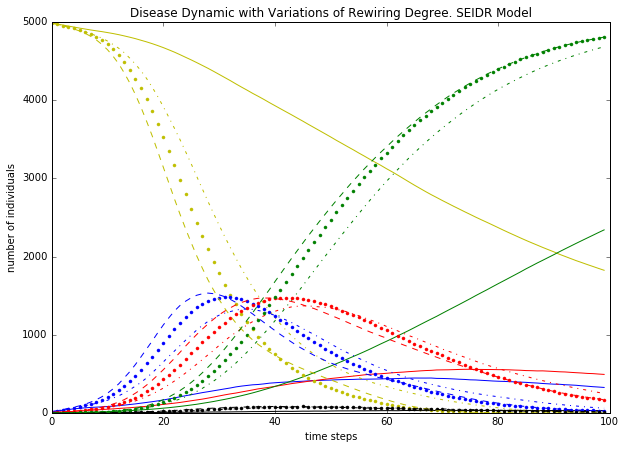

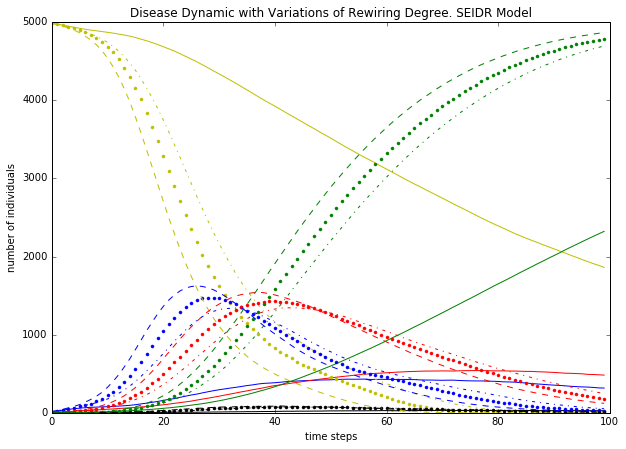

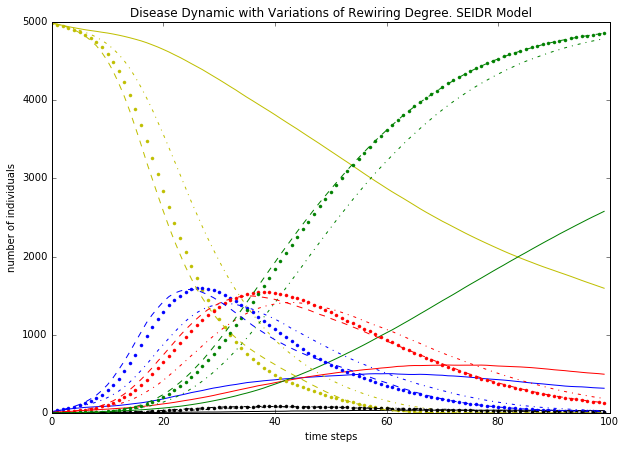

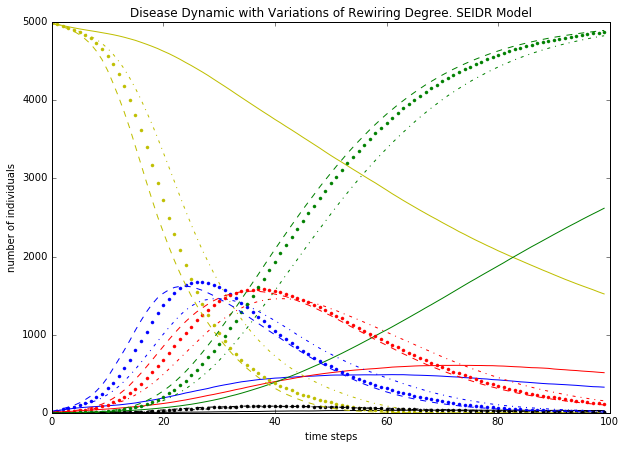

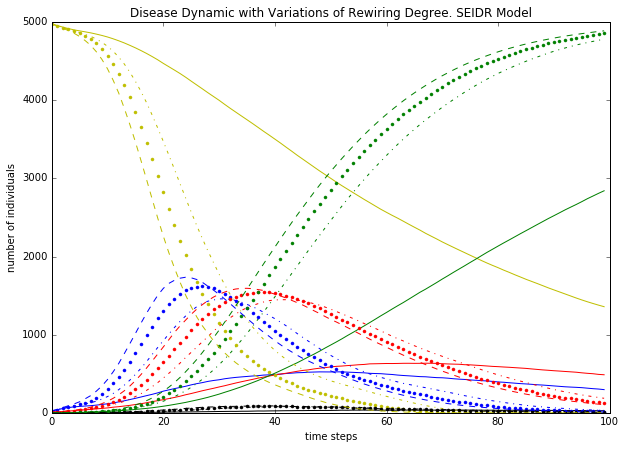

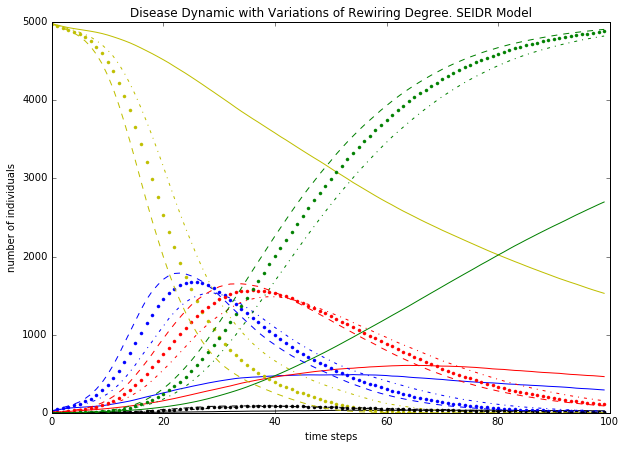

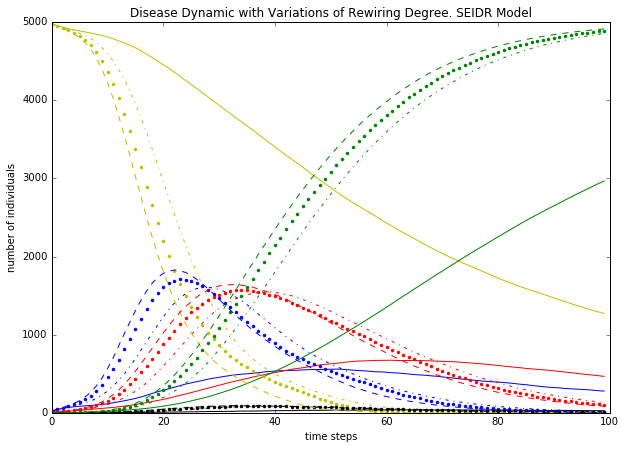

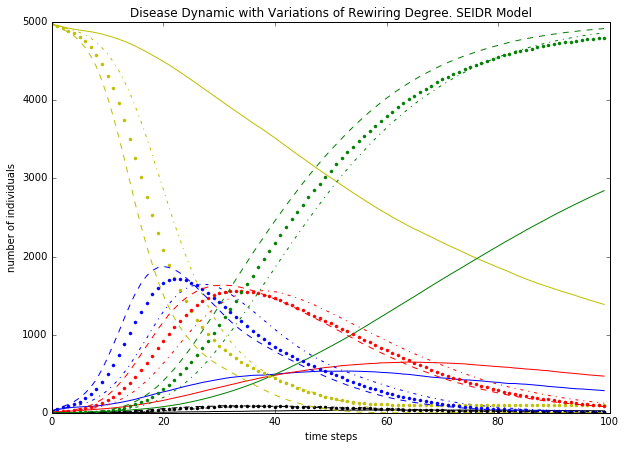

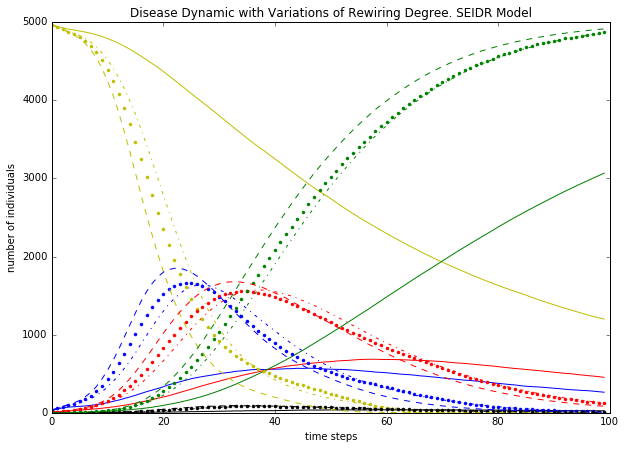

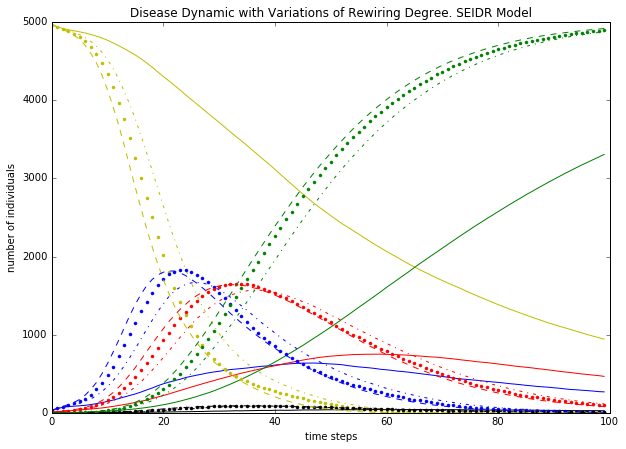

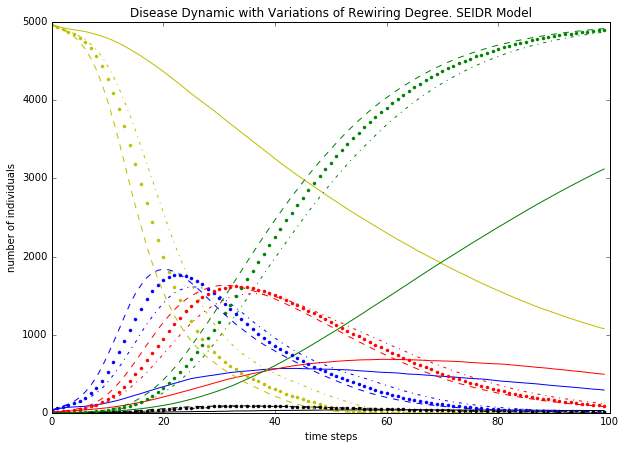

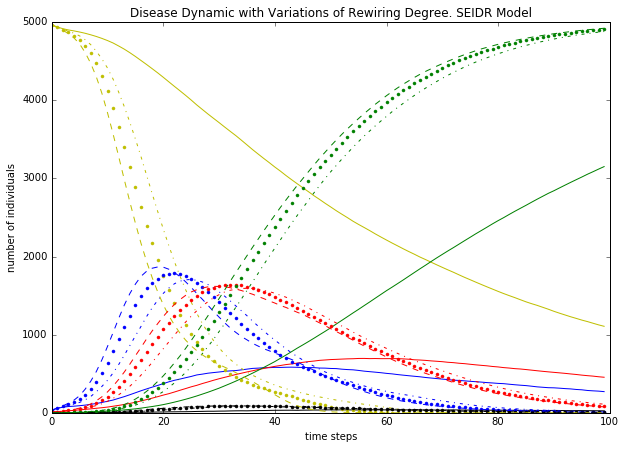

In [6]:
for b in range(beta,max_beta+1):
    for delt in range(delta, max_delta+1):
        plt.figure(figsize = (10, 7))
        for rew in range(rewire_degree, max_rewire_degree+1):
            averaged_data = estimate_average(b, delt, rew, 'HCgraphExperiment')
            averaged_data['max_time'] = x_limit
            plt.plot(range(0,averaged_data['max_time']), averaged_data['s'][:x_limit], 'y'+str(line_type[rew]))
            plt.plot(range(0,averaged_data['max_time']), averaged_data['e'][:x_limit], 'b'+str(line_type[rew]))
            plt.plot(range(0,averaged_data['max_time']), averaged_data['i'][:x_limit], 'r'+str(line_type[rew]))
            plt.plot(range(0,averaged_data['max_time']), averaged_data['d'][:x_limit], 'k'+str(line_type[rew]))
            plt.plot(range(0,averaged_data['max_time']), averaged_data['rdr'][:x_limit], 'g'+str(line_type[rew]))
        plt.title('Disease Dynamic with Variations of Rewiring Degree. SEIDR Model')
        plt.xlabel('time steps')
        plt.ylabel('number of individuals')
#         plt.savefig('ExperimentRunner/src/ERgraphExperiments/beta'+str(b)+'/delta'+str(delt)+'/r_degree_variation.png')
            
            
            

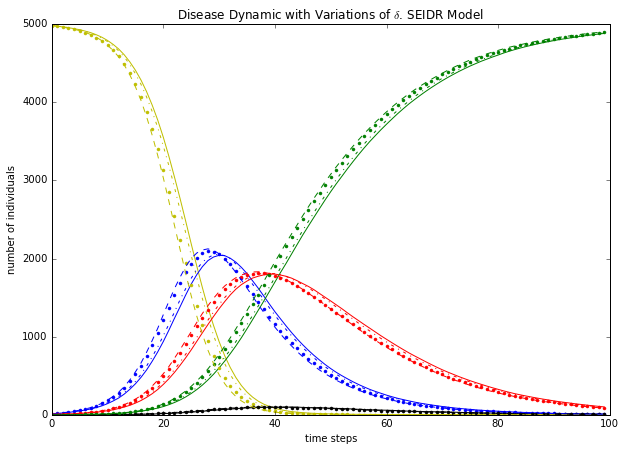

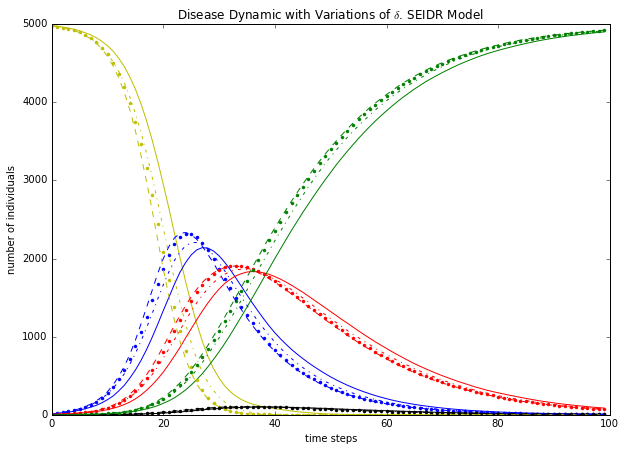

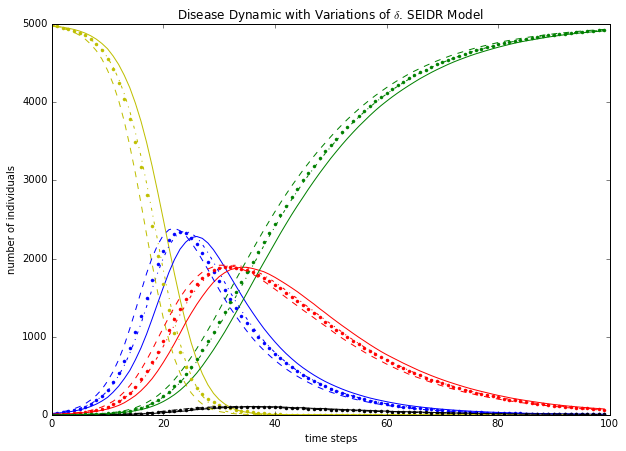

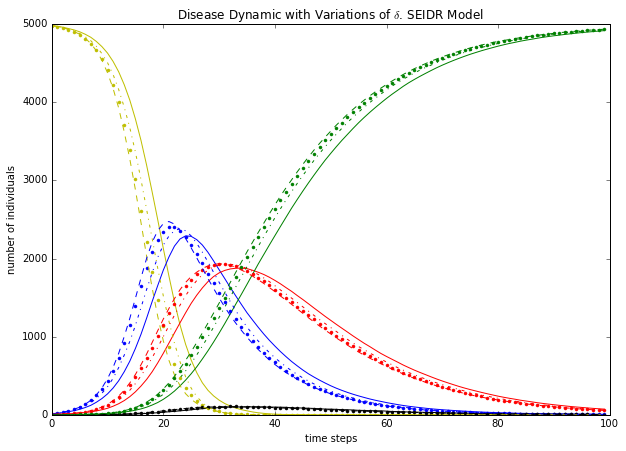

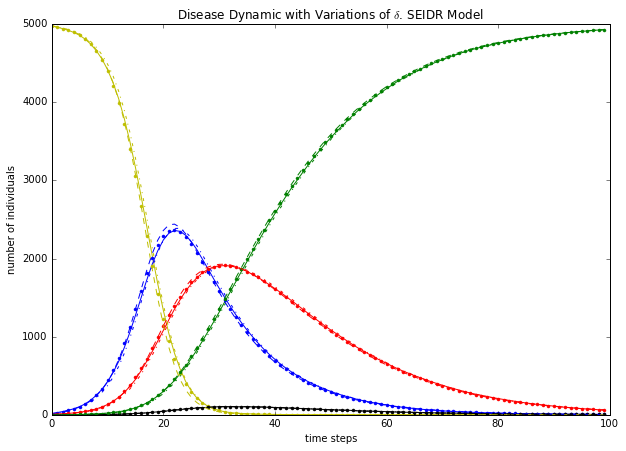

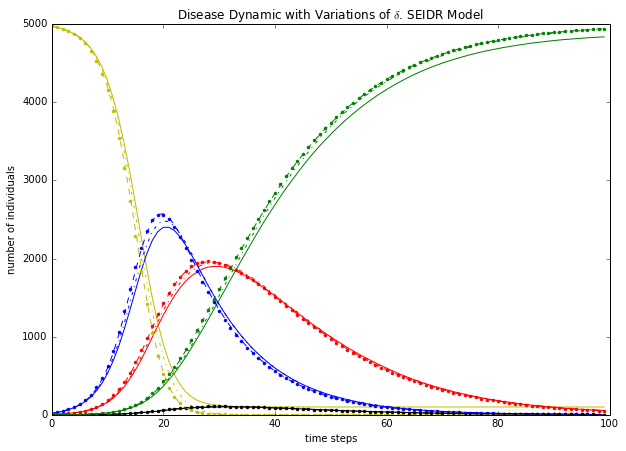

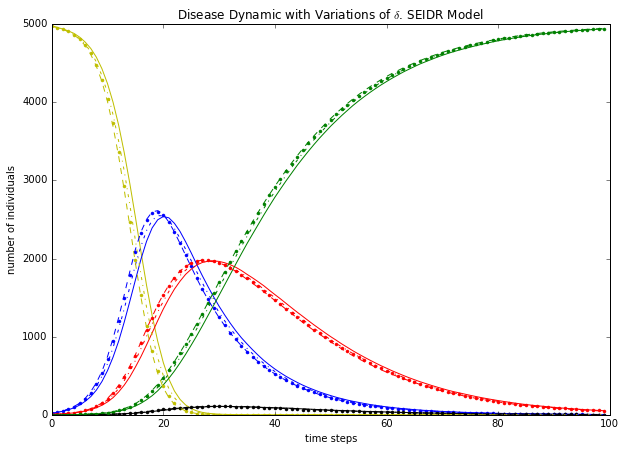

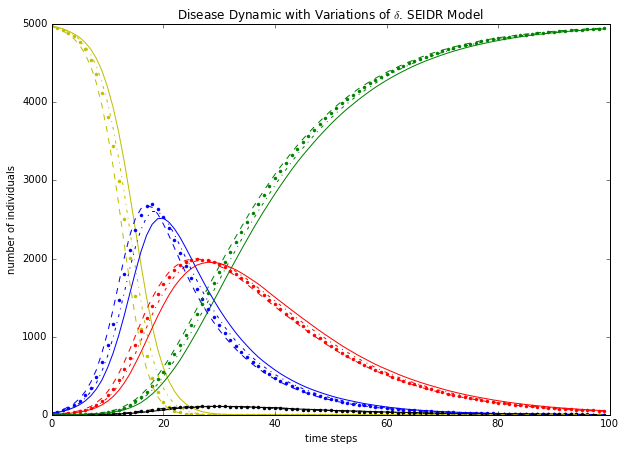

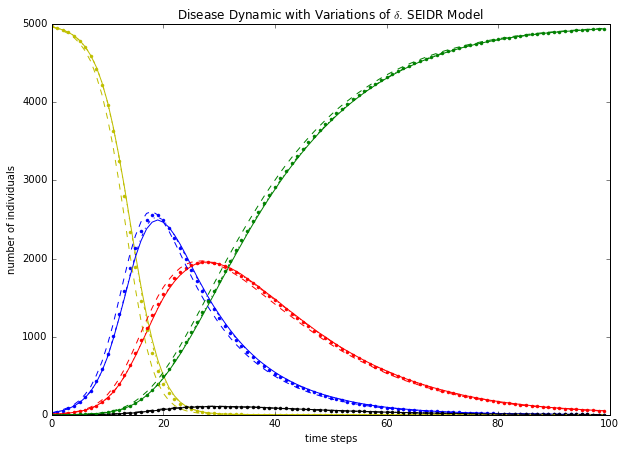

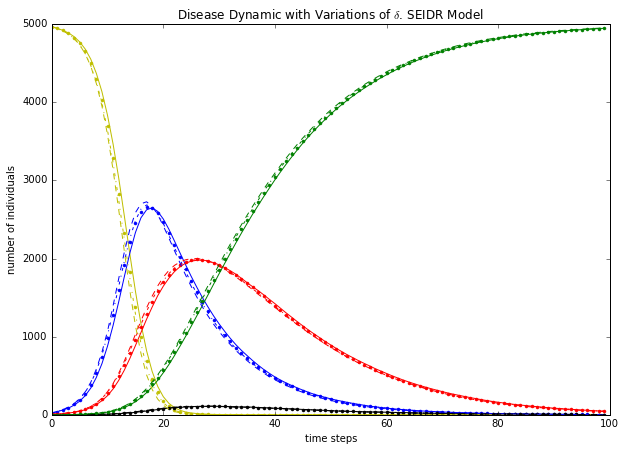

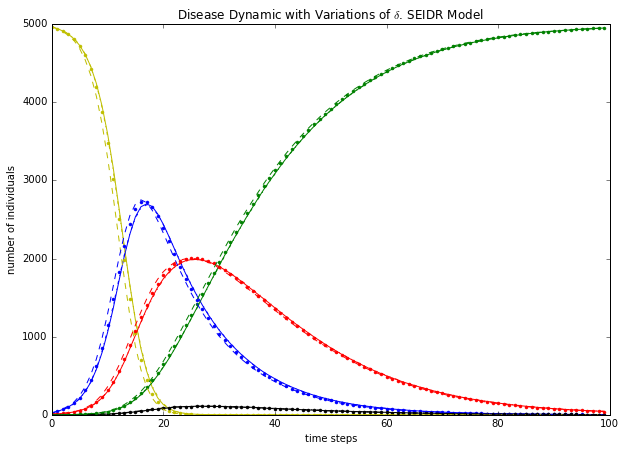

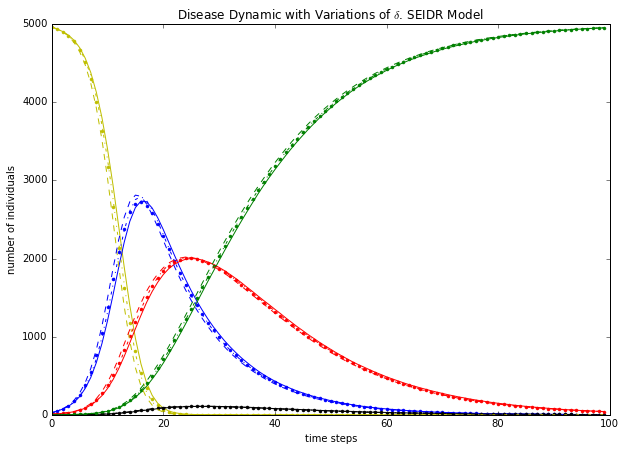

In [7]:
for b in range(beta,max_beta+1):
    for rew in range(rewire_degree, max_rewire_degree+1):
        plt.figure(figsize = (10, 7))
        for delt in range(delta, max_delta+1):
            averaged_data = estimate_average(b, delt, rew, 'ERgraphExperiments')
            averaged_data['max_time'] = x_limit
            plt.plot(range(0,averaged_data['max_time']), averaged_data['s'][:x_limit], 'y'+str(line_type[delt]))
            plt.plot(range(0,averaged_data['max_time']), averaged_data['e'][:x_limit], 'b'+str(line_type[delt]))
            plt.plot(range(0,averaged_data['max_time']), averaged_data['i'][:x_limit], 'r'+str(line_type[delt]))
            plt.plot(range(0,averaged_data['max_time']), averaged_data['d'][:x_limit], 'k'+str(line_type[delt]))
            plt.plot(range(0,averaged_data['max_time']), averaged_data['rdr'][:x_limit], 'g'+str(line_type[delt]))
        plt.title('Disease Dynamic with Variations of $\\delta$. SEIDR Model')
        plt.xlabel('time steps')
        plt.ylabel('number of individuals')
#         plt.savefig('ExperimentRunner/src/ERgraphExperiments/beta'+str(b)+'/delta_variation_degree'+str(rew)+'.png')

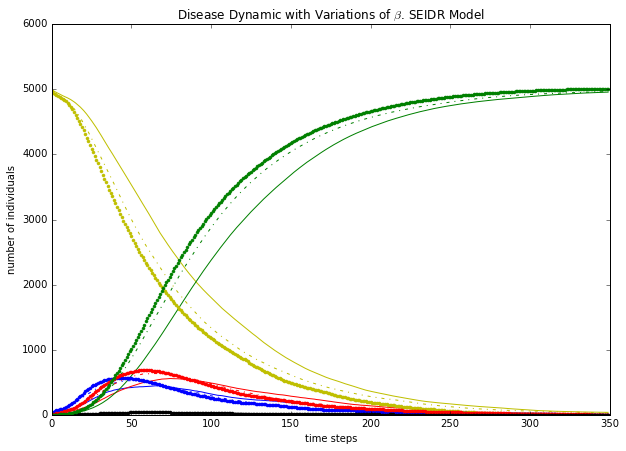

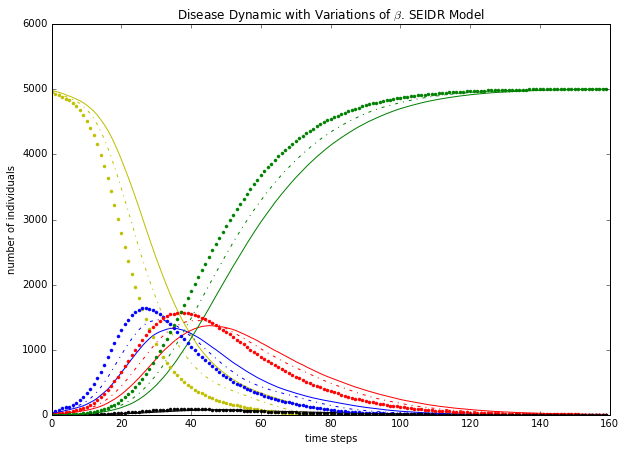

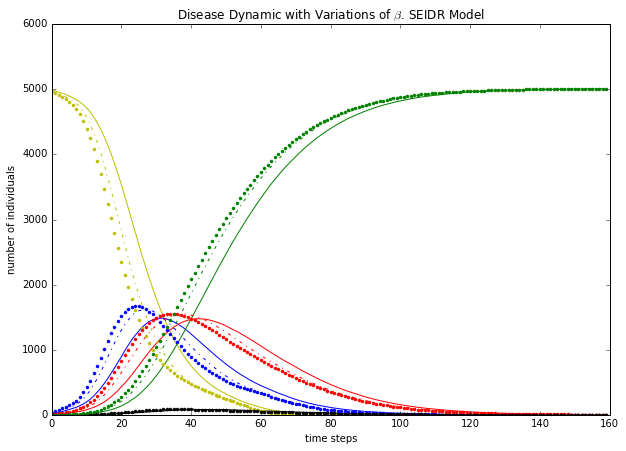

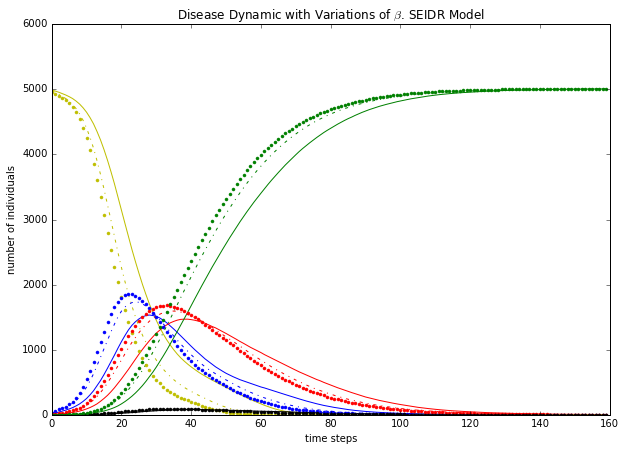

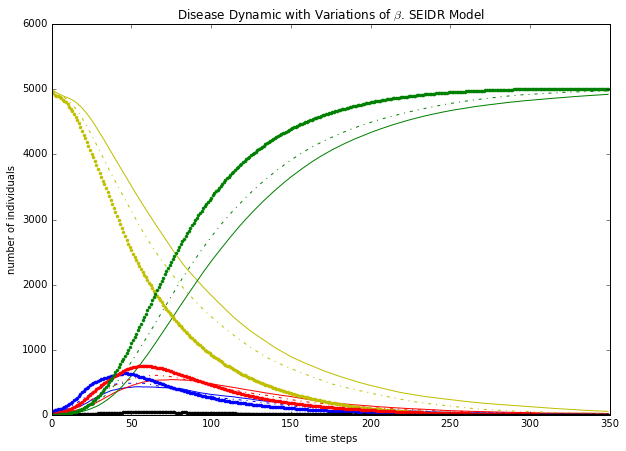

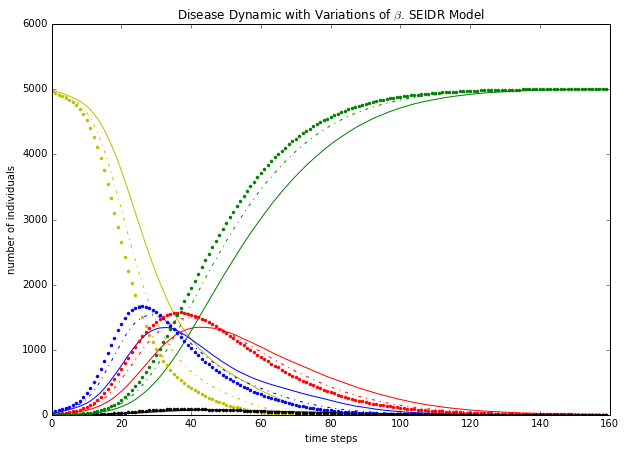

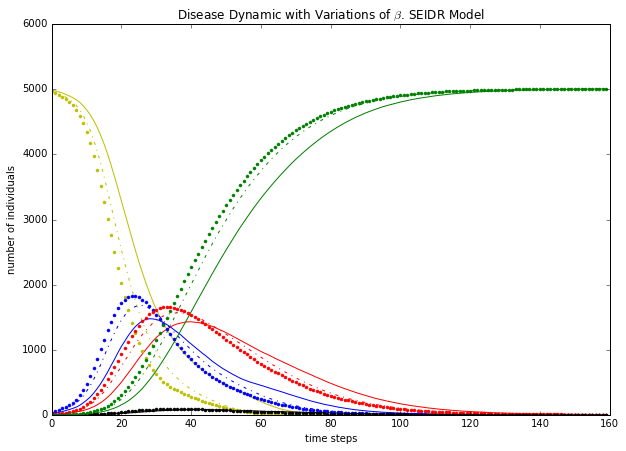

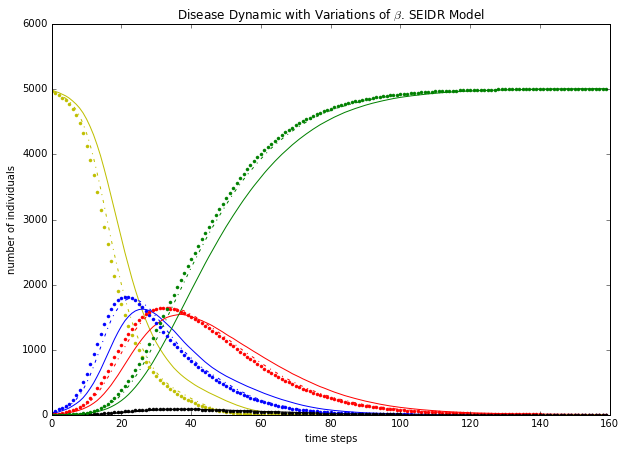

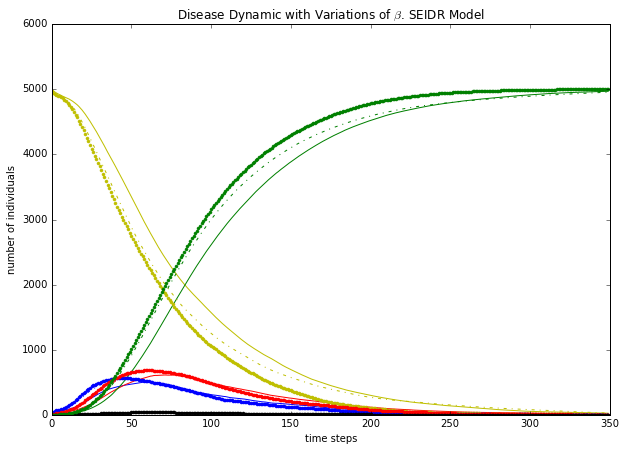

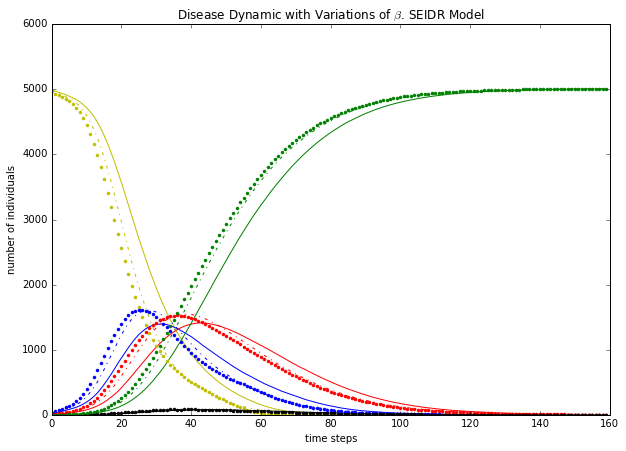

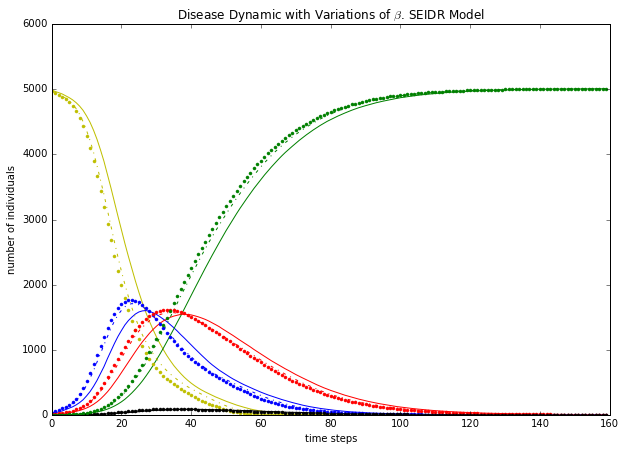

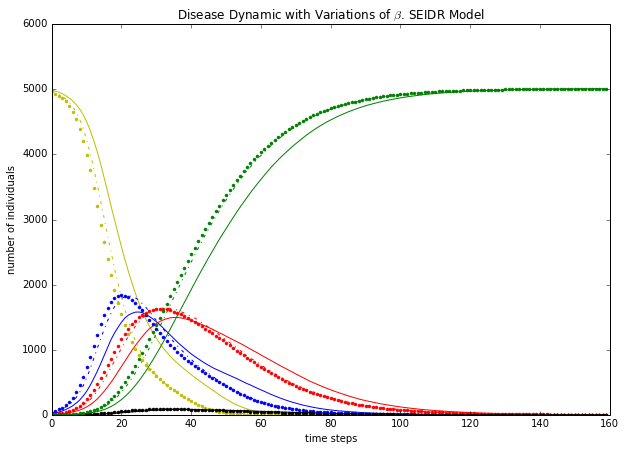

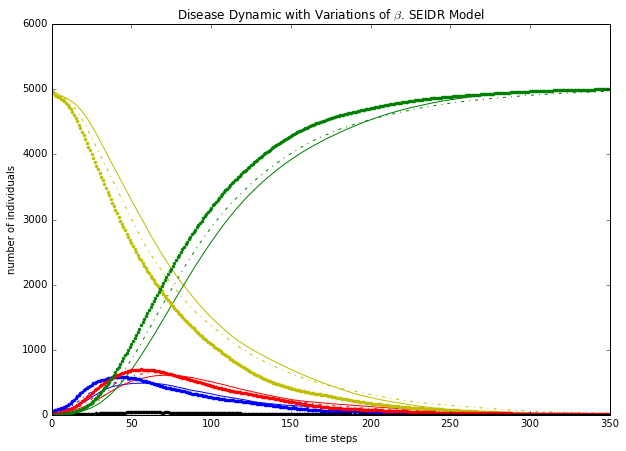

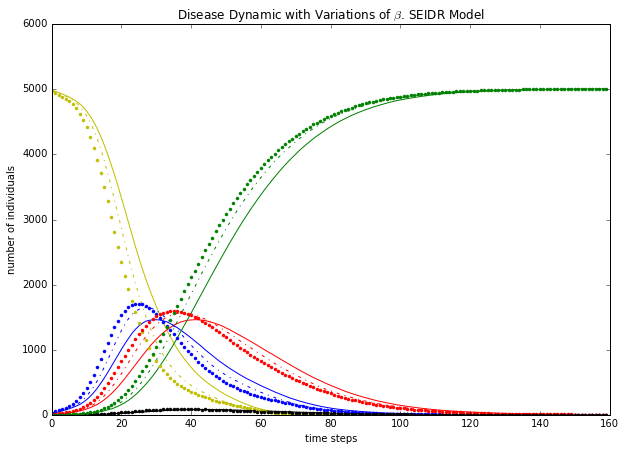

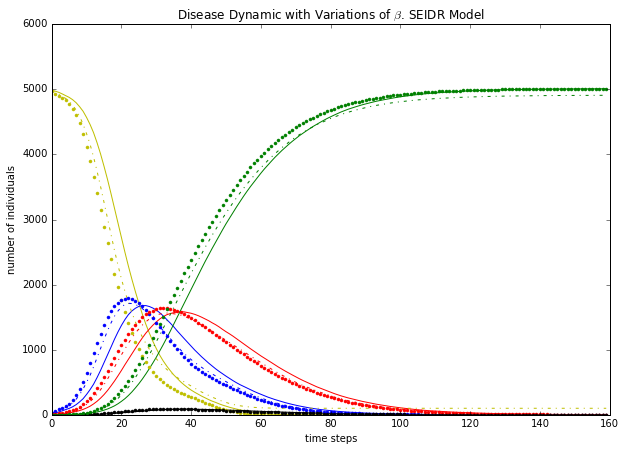

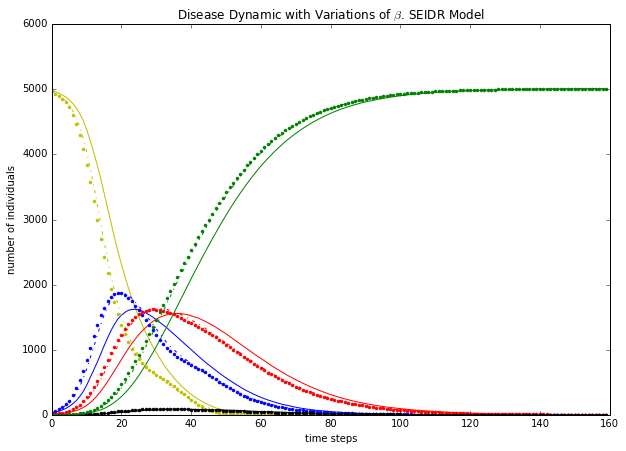

In [8]:
for delt in range(delta, max_delta+1):
    for rew in range(rewire_degree, max_rewire_degree+1):
        plt.figure(figsize = (10, 7))
        for b in range(beta,max_beta+1):
            averaged_data = estimate_average(b, delt, rew, 'HCgraphExperiment')
            if averaged_data['max_time']>350:
                x_limit = 350
            else:
                x_limit = 160
            plt.plot(range(0,x_limit), averaged_data['s'][:x_limit], 'y'+str(line_type[b]))
            plt.plot(range(0,x_limit), averaged_data['e'][:x_limit], 'b'+str(line_type[b]))
            plt.plot(range(0,x_limit), averaged_data['i'][:x_limit], 'r'+str(line_type[b]))
            plt.plot(range(0,x_limit), averaged_data['d'][:x_limit], 'k'+str(line_type[b]))
            plt.plot(range(0,x_limit), averaged_data['rdr'][:x_limit], 'g'+str(line_type[b]))
        plt.title('Disease Dynamic with Variations of $\\beta$. SEIDR Model')
        plt.xlabel('time steps')
        plt.ylabel('number of individuals')
#         plt.savefig('ExperimentRunner/src/HCgraphExperiment'+'/beta_variation_degree-hc'+str(rew)+'delta'+str(delt)+'.png')

[3320.46, 3167.09, 3991.86]
[591.84, 609.19, 297.6]
[38, 34, 22]


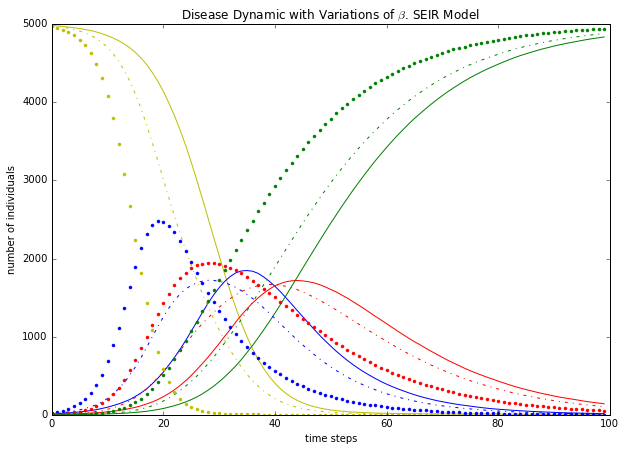

In [10]:
plt.figure(figsize = (10, 7))
max_ei = []
th_s = []
indices = []
x_limit = 100
for b in range(beta,max_beta+1):
    seir_average = seir_estimate_average(b, 'ERgraphExperiments')
    ei = [x + y for x, y in zip(seir_average['e'], seir_average['i'])]
    my_max = max(ei)
    max_ei.append(my_max)
    ind = ei.index(my_max)
    indices.append(ind)
    th_s.append(seir_average['s'][ind])
    seir_average['max_time'] = x_limit
    plt.plot(range(0,seir_average['max_time']), seir_average['s'][:x_limit], 'y'+str(line_type[b]))
    plt.plot(range(0,seir_average['max_time']), seir_average['e'][:x_limit], 'b'+str(line_type[b]))
    plt.plot(range(0,seir_average['max_time']), seir_average['i'][:x_limit], 'r'+str(line_type[b]))
    plt.plot(range(0,seir_average['max_time']), seir_average['r'][:x_limit], 'g'+str(line_type[b]))
plt.title('Disease Dynamic with Variations of $\\beta$. SEIR Model')
plt.xlabel('time steps')
plt.ylabel('number of individuals')
print max_ei
print th_s
print indices

# plt.savefig('ExperimentRunner/src/HCgraphExperiment'+'/seir_beta_variation.png')

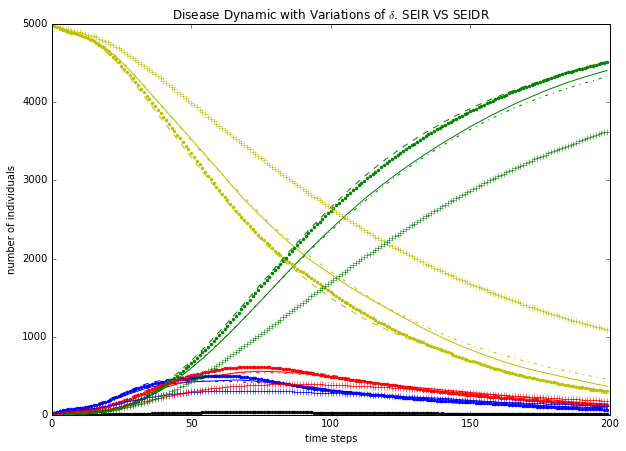

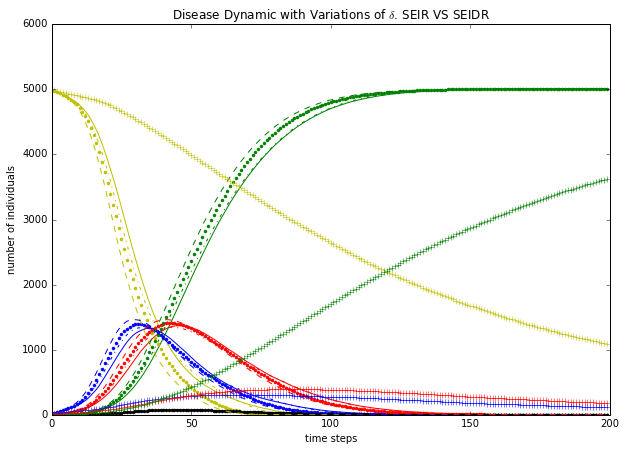

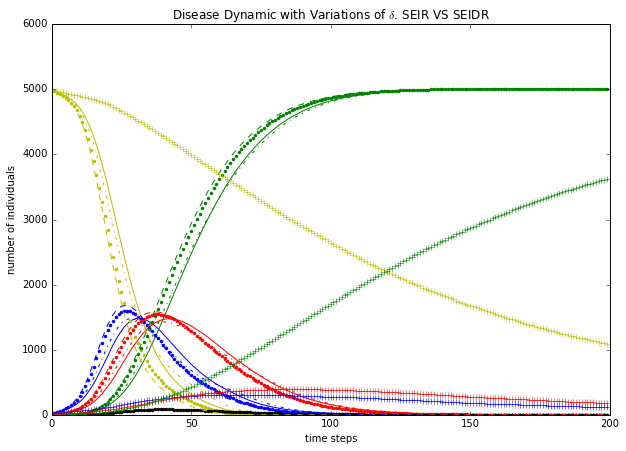

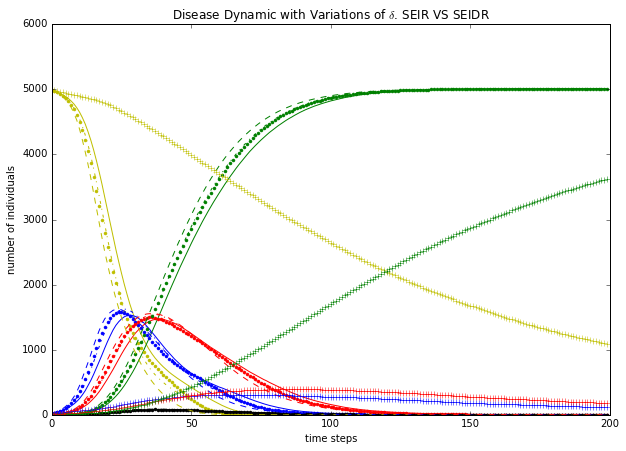

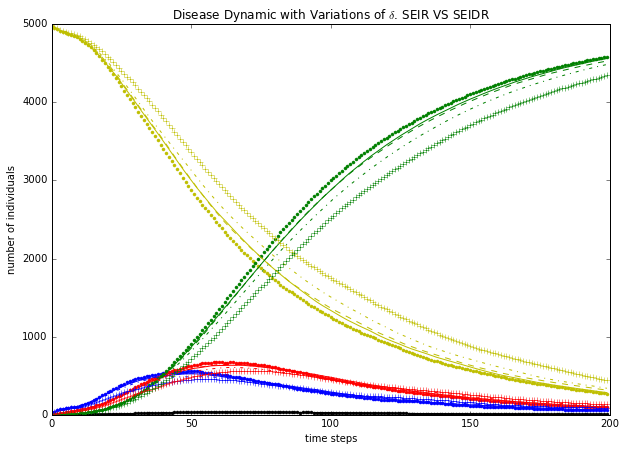

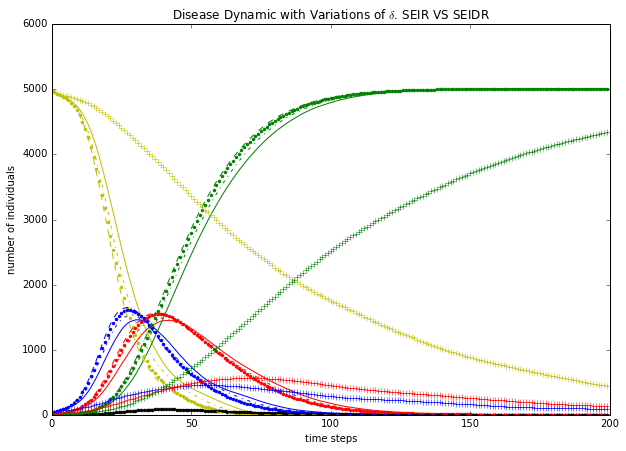

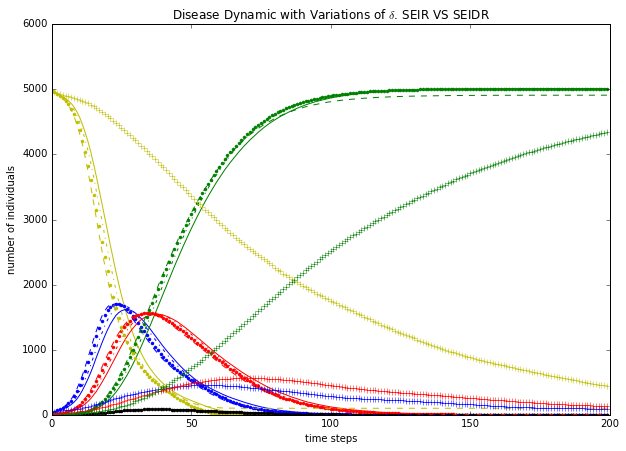

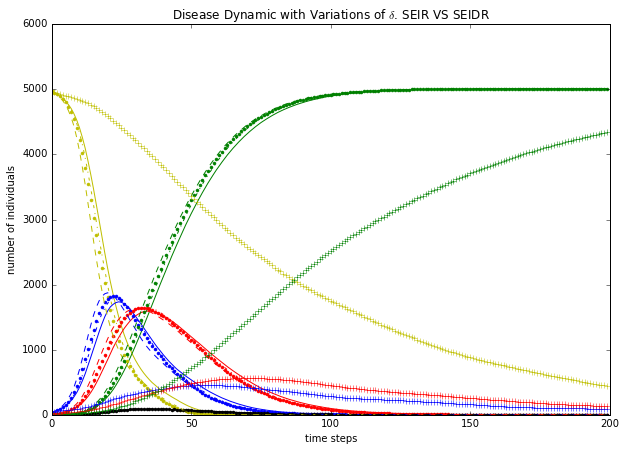

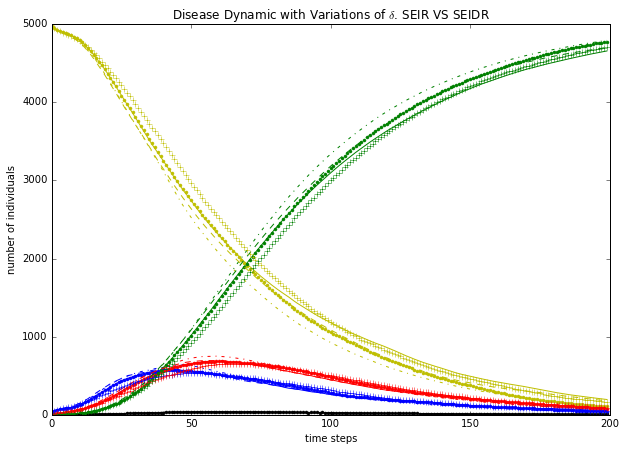

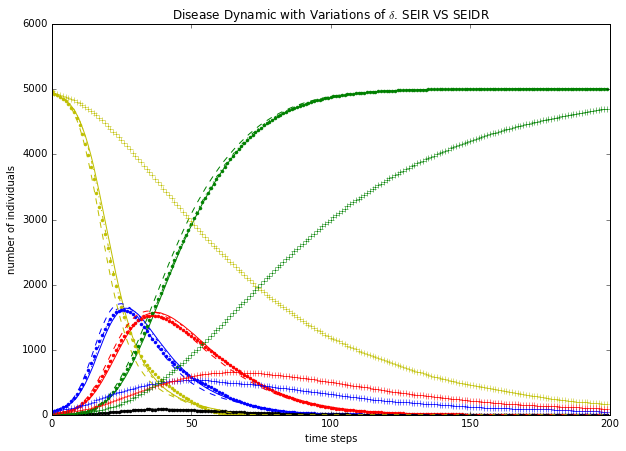

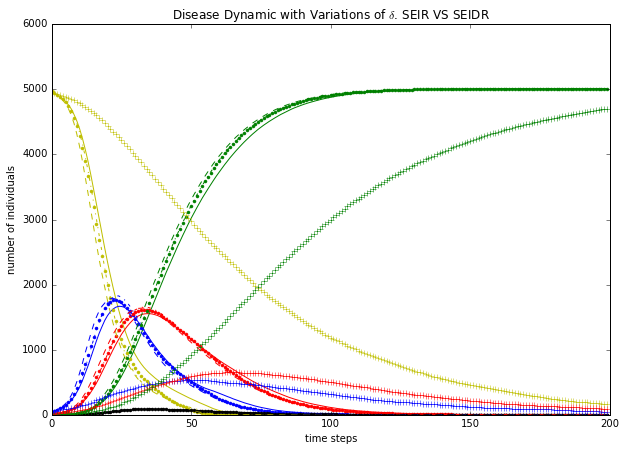

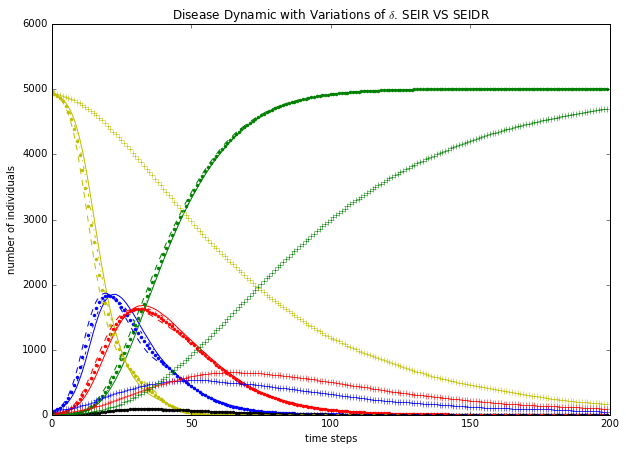

In [11]:
x_limit = 200
for b in range(beta,max_beta+1):
    seir_average = seir_estimate_average(b, 'HCgraphExperiment')
    for rew in range(rewire_degree, max_rewire_degree+1):
        plt.figure(figsize = (10, 7))
        for delt in range(delta, max_delta+1):
            averaged_data = estimate_average(b, delt, rew, 'HCgraphExperiment')
            averaged_data['max_time'] = x_limit
            plt.plot(range(0,averaged_data['max_time']), averaged_data['s'][:x_limit], 'y'+str(line_type[delt]))
            plt.plot(range(0,averaged_data['max_time']), averaged_data['e'][:x_limit], 'b'+str(line_type[delt]))
            plt.plot(range(0,averaged_data['max_time']), averaged_data['i'][:x_limit], 'r'+str(line_type[delt]))
            plt.plot(range(0,averaged_data['max_time']), averaged_data['d'][:x_limit], 'k'+str(line_type[delt]))
            plt.plot(range(0,averaged_data['max_time']), averaged_data['rdr'][:x_limit], 'g'+str(line_type[delt]))
        seir_average['max_time'] = x_limit
        plt.plot(range(0,seir_average['max_time']), seir_average['s'][:x_limit], 'y+')
        plt.plot(range(0,seir_average['max_time']), seir_average['e'][:x_limit], 'b+')
        plt.plot(range(0,seir_average['max_time']), seir_average['i'][:x_limit], 'r+')
        plt.plot(range(0,seir_average['max_time']), seir_average['r'][:x_limit], 'g+')
        plt.title('Disease Dynamic with Variations of $\\delta$. SEIR VS SEIDR')
        plt.xlabel('time steps')
        plt.ylabel('number of individuals')
        plt.savefig('ExperimentRunner/src/HCgraphExperiment/beta'+str(b)+'/seirVSseidr_all_deltas-hc'+str(rew)+'.png')

[3320.46, 698.48]
[591.84, 3039.34]
[38, 84]
[127, 1041]


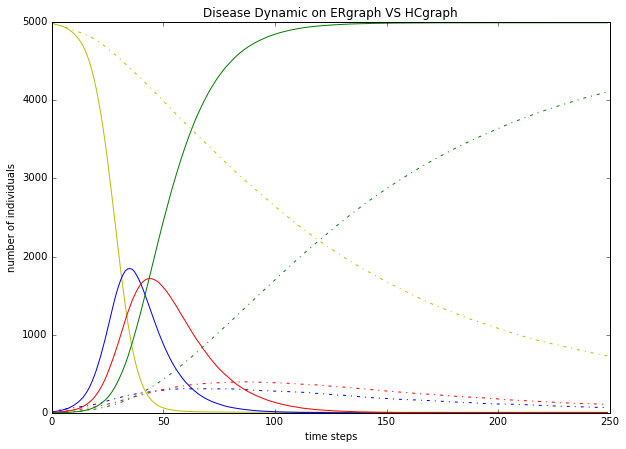

In [27]:
b = 0
max_ei = []
th_s = []
indices = []
times = []
x_limit = seir_estimate_average(b, graphs[0])['max_time']
graphs = ['ERgraphExperiments','HCgraphExperiment']
seir_average = {}
plt.figure(figsize = (10, 7))
for i in range(0, len(graphs)):
    seir_average[i] = seir_estimate_average(b, graphs[i]) 
    ei = [x + y for x, y in zip(seir_average[i]['e'], seir_average[i]['i'])]
    my_max = max(ei)
    max_ei.append(my_max)
    ind = ei.index(my_max)
    indices.append(ind)
    th_s.append(seir_average[i]['s'][ind])
    times.append(seir_average[i]['s'].index((seir_average[i]['s'][len(seir_average[i]['s'])-1])))
    plt.plot(range(0,x_limit), seir_average[i]['s'][:x_limit], 'y'+str(line_type[i]))
    plt.plot(range(0,x_limit), seir_average[i]['e'][:x_limit], 'b'+str(line_type[i]))
    plt.plot(range(0,x_limit), seir_average[i]['i'][:x_limit], 'r'+str(line_type[i]))
    plt.plot(range(0,x_limit), seir_average[i]['r'][:x_limit], 'g'+str(line_type[i]))
plt.title('Disease Dynamic on ERgraph VS HCgraph')
plt.xlabel('time steps')
plt.ylabel('number of individuals')
# plt.savefig('ExperimentRunner/src/seirHCvsERbeta0.png')
print max_ei
print th_s
print indices
print times

[3996.88, 2906.24]
[347.72, 1261.7]
[24, 29]
[58, 81]


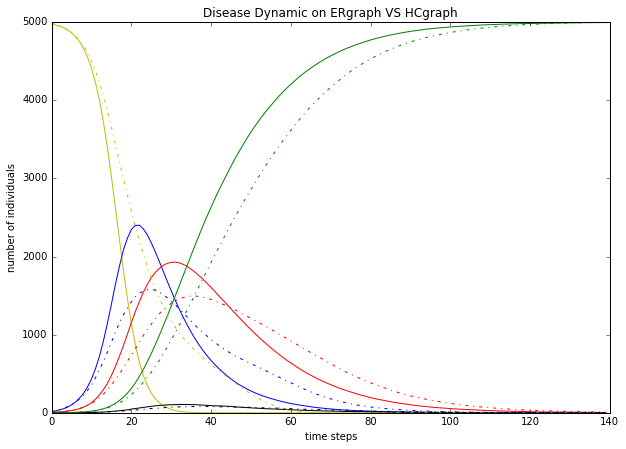

In [13]:
b = 0
delt =2
rew = 3
max_eid = []
th_s = []
indices = []
times = []
x_limit = 140
graphs = ['ERgraphExperiments','HCgraphExperiment']
seir_average = {}
plt.figure(figsize = (10, 7))
for i in range(0, len(graphs)):
    seir_average[i] = estimate_average(b,delt,rew, graphs[i]) 
    ei = [x + y for x, y in zip(seir_average[i]['e'], seir_average[i]['i'])]
    eid = [x + y for x, y in zip(ei, seir_average[i]['d'])]
    my_max = max(eid)
    max_eid.append(my_max)
    ind = eid.index(my_max)
    indices.append(ind)
    th_s.append(seir_average[i]['s'][ind])
    times.append(seir_average[i]['s'].index((seir_average[i]['s'][len(seir_average[i]['s'])-1])))
    plt.plot(range(0,x_limit), seir_average[i]['s'][:x_limit], 'y'+str(line_type[i]))
    plt.plot(range(0,x_limit), seir_average[i]['e'][:x_limit], 'b'+str(line_type[i]))
    plt.plot(range(0,x_limit), seir_average[i]['i'][:x_limit], 'r'+str(line_type[i]))
    plt.plot(range(0,x_limit), seir_average[i]['d'][:x_limit], 'k'+str(line_type[i]))
    plt.plot(range(0,x_limit), seir_average[i]['rdr'][:x_limit], 'g'+str(line_type[i]))
plt.title('Disease Dynamic on ERgraph VS HCgraph')
plt.xlabel('time steps')
plt.ylabel('number of individuals')
plt.savefig('ExperimentRunner/src/seirHCvsER023.png')
print max_eid
print th_s
print indices
print times

In [14]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
beta = 2
col1 = 12
col2 = 15
betas = [0.1151,0.2151,0.3151]
deltas = [0.289,0.389,0.489,0.589]
rewires = [0.0,0.15,0.25,0.35]
colors = ['rgba(51,0,255,1)', 'rgba(51,0,202,1)', 'rgba(51,0,150,1)', 'rgba(51,0,102,1)']
x1 = ["SEIR"]
data = []
da = {}
colors = ['rgba(0,139,139,1)', 'rgba(250,128,114,1)']
names = ['Time step when the peak of an outbreak occurs','Number of contaminated people at the peak of the outbreak']


b = 2
delt = 2
max_eid = []
th_s = []
indices = []
times = []
seir_average = seir_estimate_average(b, 'ERgraphExperiments')
rew = 0
for delt in range(0, len(deltas)):
    averaged_data = estimate_average(b, delt, rew, 'ERgraphExperiments')
    averaged_data['max_time'] = x_limit
    ei = [x + y for x, y in zip(averaged_data['e'], averaged_data['i'])]
    eid = [x + y for x, y in zip(ei, averaged_data['d'])]
    my_max = max(eid)
    max_eid.append(my_max)
    ind = eid.index(my_max)
    indices.append(ind)
    th_s.append(averaged_data['s'][ind])
    times.append(averaged_data['s'].index((averaged_data['s'][len(averaged_data['s'])-1])))
ei1 = [x + y for x, y in zip(seir_average['e'], seir_average['i'])]
max_eid.insert(0,max(ei1)) 
index = ei1.index(max(ei1))
indices.insert(0,index)
th_s.insert(0,seir_average['s'][index])
times.insert(0,seir_average['s'].index((seir_average['s'][len(seir_average['s'])-1])))
da[1] = max_eid
da[0] = indices
print 'max', max_eid
print 'indices',indices
print 'th_s',th_s
print 'times',times

x1 = ['SEIR', 'SEIDR 0.289', 'SEIDR 0.389', 'SEIDR 0.489', 'SEIDR 0.589']

for mm in range(0,2):
    trace = go.Bar(
        x=x1,
        y=da[mm],
        name=names[mm],
        marker=dict(
            color=colors[mm], 
            line=dict(
                color='rgba(255,255,255,1)',
                width=2,
            )
        )
    )
    data.append(trace)


fig = tools.make_subplots(rows=1, cols=2)

fig.append_trace(data[0], 1, 1)
fig.append_trace(data[1], 1, 2)

fig['layout'].update(height=600, width=1000, title='Difference in dynamic parameters using SEIR and SEIDR models')
py.iplot(fig, filename='UnitsTwoGraphs21')

max [3991.86, 4091.62, 4104.78, 4134.5199999999995, 4178.6]
indices [22, 22, 21, 21, 20]
th_s [297.6, 242.24, 326.28, 276.06, 276.18]
times [95, 75, 92, 78, 102]
This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]

